### Imports

In [1]:
import torch
import numpy as np

In [6]:
# our library
from svetlanna import SimulationParameters
from svetlanna import Wavefront

from svetlanna import elements
from svetlanna.detector import Detector

In [7]:
from svetlanna.setup import LinearOpticalSetup

In [8]:
import matplotlib.pyplot as plt

plt.style.use('dark_background')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## 1. Creation of `LinearOpticalSetup`

In [9]:
# simulation parameters
x_nodes = 100
y_nodes = x_nodes

x_size = 20 * 1e-2  # [m]
y_size = x_size  # [m]

wavelength = 1000 * 1e-9  # [m]

sim_params = SimulationParameters(
    x_size=x_size,  # [m]
    y_size=y_size,  # [m]
    x_nodes=x_nodes,
    y_nodes=y_nodes,
    wavelength=wavelength  # [m]
)

### 1.1. All elements for a setup

In [20]:
# TODO: default method 'auto' for a FreeSpace?
# TODO: fix the problem with a 'fresnel' method for a FreeSpace!

# in the following example a same method was used for all FreeSpace's elements
free_space_method = 'AS'

In [21]:
free_space_1 = elements.FreeSpace(
    simulation_parameters=sim_params,
    distance=1 * 1e-2,  # [m]
    method=free_space_method,
)

thin_lense_1 = elements.ThinLens(
    simulation_parameters = sim_params,
    focal_length=1 * 1e-2,  # [m]
    radius=5 * 1e-2,  # [m]
)

free_space_2 = elements.FreeSpace(
    simulation_parameters=sim_params,
    distance=2 * 1e-2,  # [m]
    method=free_space_method,
)

slm_1 = elements.SpatialLightModulator(
    simulation_parameters=sim_params,
    # TODO: any mask we want! not necessary to generate a mask of int's!
    mask=torch.randint(256, (sim_params.y_nodes, sim_params.x_nodes)),  # random mask!
    number_of_levels=256,
)

free_space_3 = elements.FreeSpace(
    simulation_parameters=sim_params,
    distance=1.5 * 1e-2,  # [m]
    method=free_space_method,
)

thin_lense_2 = elements.ThinLens(
    simulation_parameters = sim_params,
    focal_length=1 * 1e-2,  # [m]
    radius=5 * 1e-2,  # [m]
)

free_space_4 = elements.FreeSpace(
    simulation_parameters=sim_params,
    distance=3 * 1e-2,  # [m]
    method=free_space_method,
)

slm_2 = elements.SpatialLightModulator(
    simulation_parameters=sim_params,
    mask=torch.randint(256, (sim_params.y_nodes, sim_params.x_nodes)),  # random mask!
    number_of_levels=256,
)

free_space_5 = elements.FreeSpace(
    simulation_parameters=sim_params,
    distance=2 * 1e-2,  # [m]
    method=free_space_method,
)

In [22]:
setup_elements = [
    free_space_1,
    thin_lense_1,
    free_space_2,
    slm_1,
    free_space_3,
    thin_lense_2,
    free_space_4,
    slm_2,
    free_space_5
]

### 1.2. `LinearOpticalSetup`

In [23]:
setup = LinearOpticalSetup(
    elements=setup_elements
)

## 2. Propagation through the optical setup

### 2.1. Input wavefront

In [42]:
# generate beam wavefront

beam_prop_distance = 0 * 1e-2  # [m]

beam_wavefront = Wavefront.gaussian_beam(
    simulation_parameters=sim_params,
    waist_radius=5 * 1e-2,  # [m]
    distance=beam_prop_distance,  # [m]
)

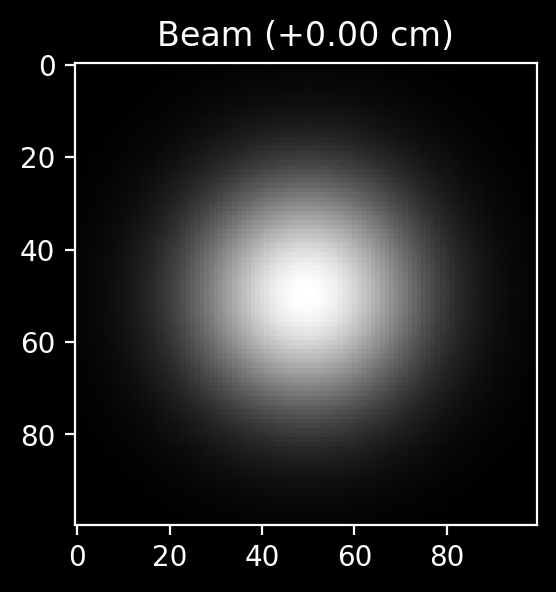

In [43]:
fig, ax0 = plt.subplots(1, 1, figsize=(3, 3))

ax0.set_title(f'Beam (+{beam_prop_distance * 100:.2f} cm)')
ax0.imshow(beam_wavefront.abs(), cmap='gray')

plt.show()

### 2.2. Stepwise propagation

In [44]:
setup_scheme, wavefronts = setup.stepwise_forward(input_wavefront=beam_wavefront)

In [45]:
# scheme of propagation
# index for each wavefront is pointe in (...) on arrows
print(setup_scheme)

-(0)-> [1. FreeSpace] -(1)-> [2. ThinLens] -(2)-> [3. FreeSpace] -(3)-> [4. SpatialLightModulator] -(4)-> [5. FreeSpace] -(5)-> [6. ThinLens] -(6)-> [7. FreeSpace] -(7)-> [8. SpatialLightModulator] -(8)-> [9. FreeSpace] -(9)->


-(0)-> [1. FreeSpace] -(1)-> [2. ThinLens] -(2)-> [3. FreeSpace] -(3)-> [4. SpatialLightModulator] -(4)-> [5. FreeSpace] -(5)-> [6. ThinLens] -(6)-> [7. FreeSpace] -(7)-> [8. SpatialLightModulator] -(8)-> [9. FreeSpace] -(9)->


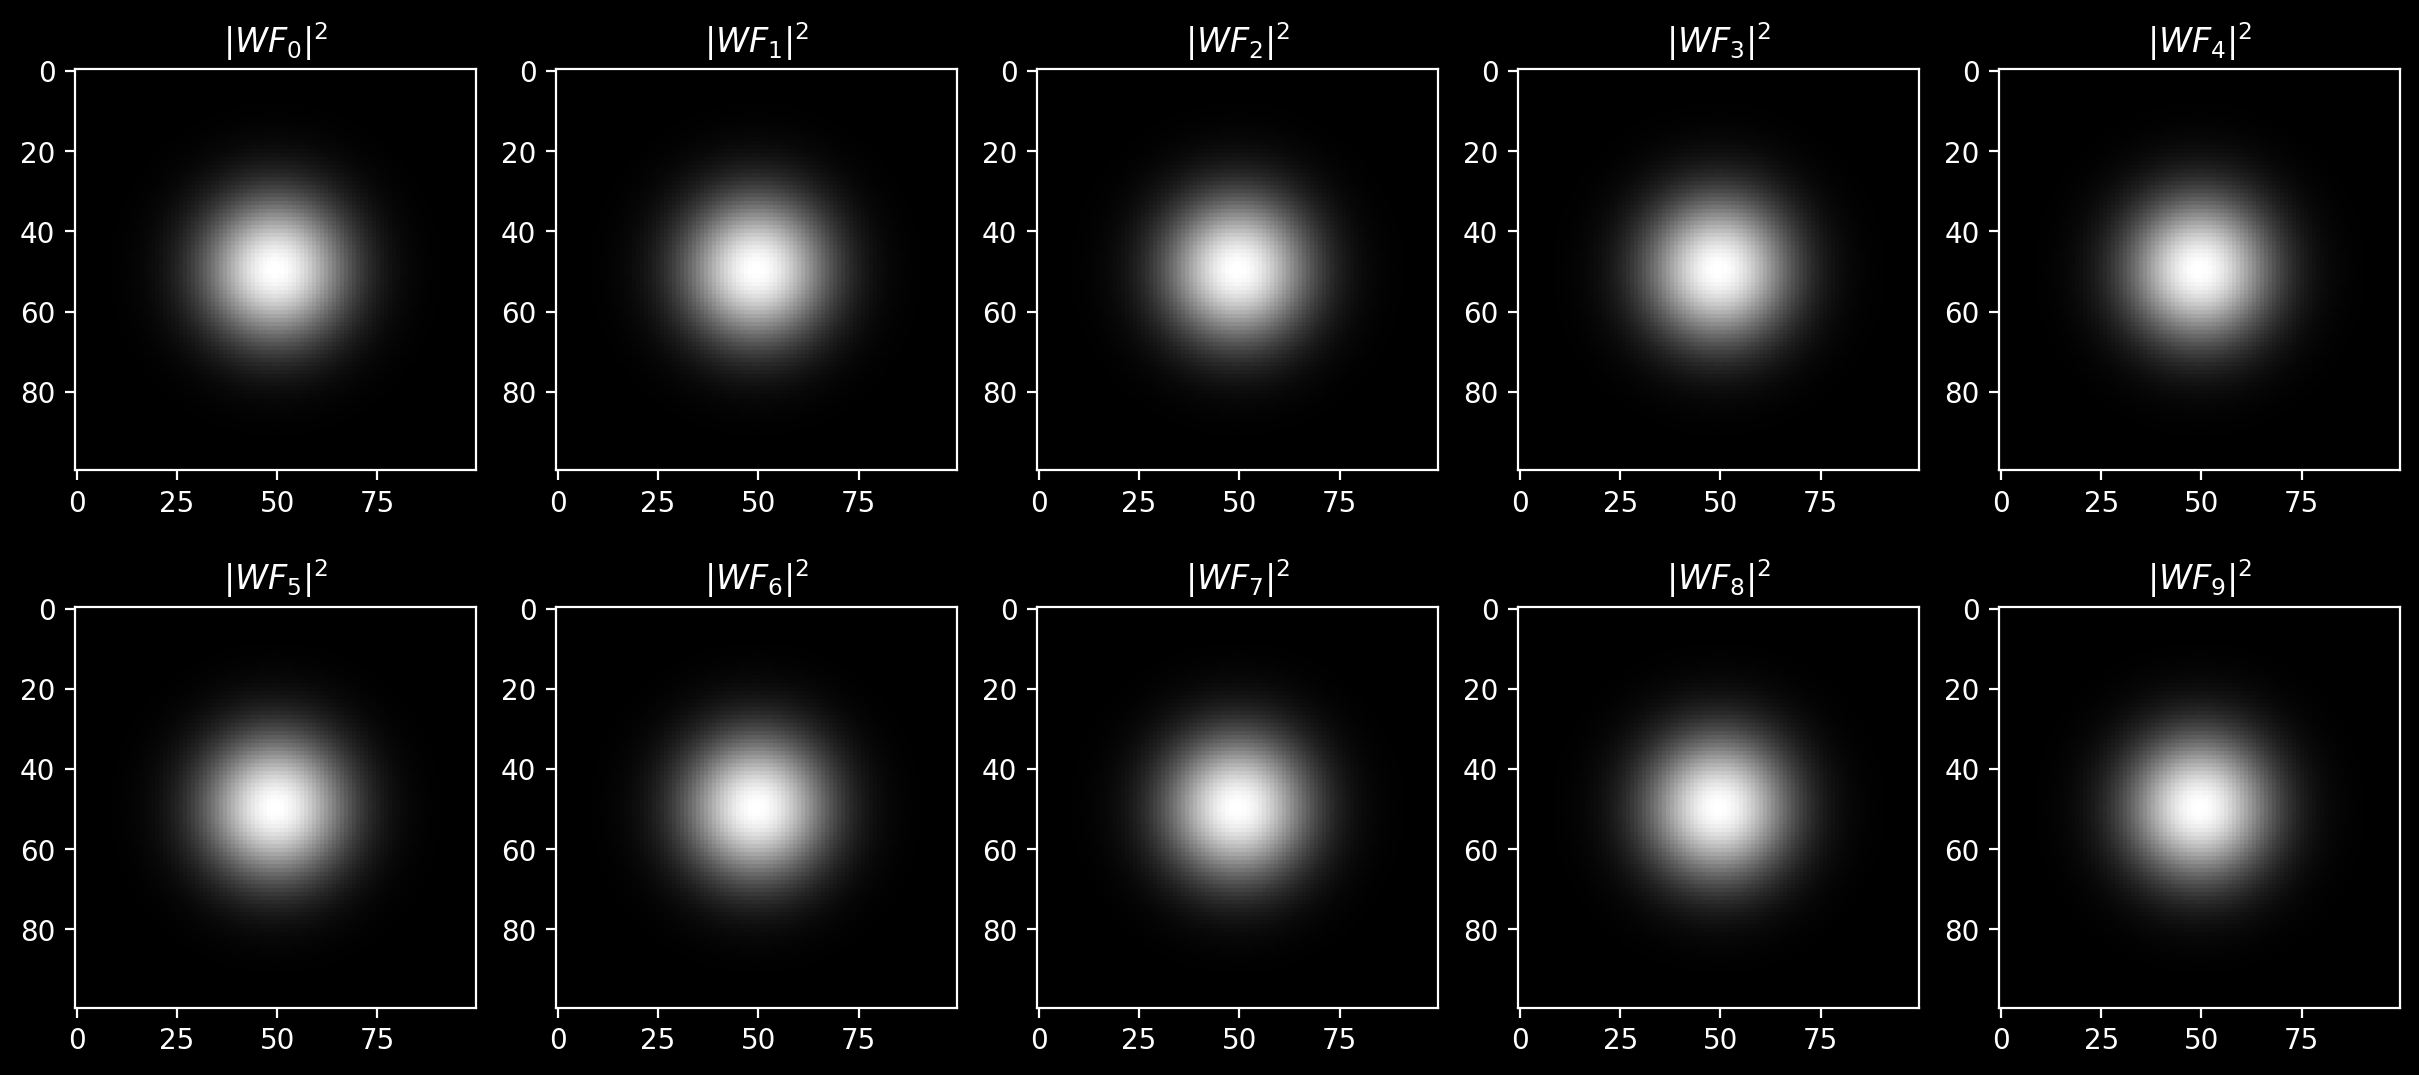

In [46]:
print(setup_scheme)

# plot wavefronts abs()
n_cols = 5  # number of columns to plot all wavefronts during propagation
n_rows = 2

fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols * 3, n_rows * 3.2))
for ind_wf, wavefront in enumerate(wavefronts):
    ax_this = axs[ind_wf // n_cols][ind_wf % n_cols]

    ax_this.set_title(f'$|WF_{ind_wf}|^2$')
    ax_this.imshow(wavefront.intensity, cmap='gray')

plt.show()

-(0)-> [1. FreeSpace] -(1)-> [2. ThinLens] -(2)-> [3. FreeSpace] -(3)-> [4. SpatialLightModulator] -(4)-> [5. FreeSpace] -(5)-> [6. ThinLens] -(6)-> [7. FreeSpace] -(7)-> [8. SpatialLightModulator] -(8)-> [9. FreeSpace] -(9)->


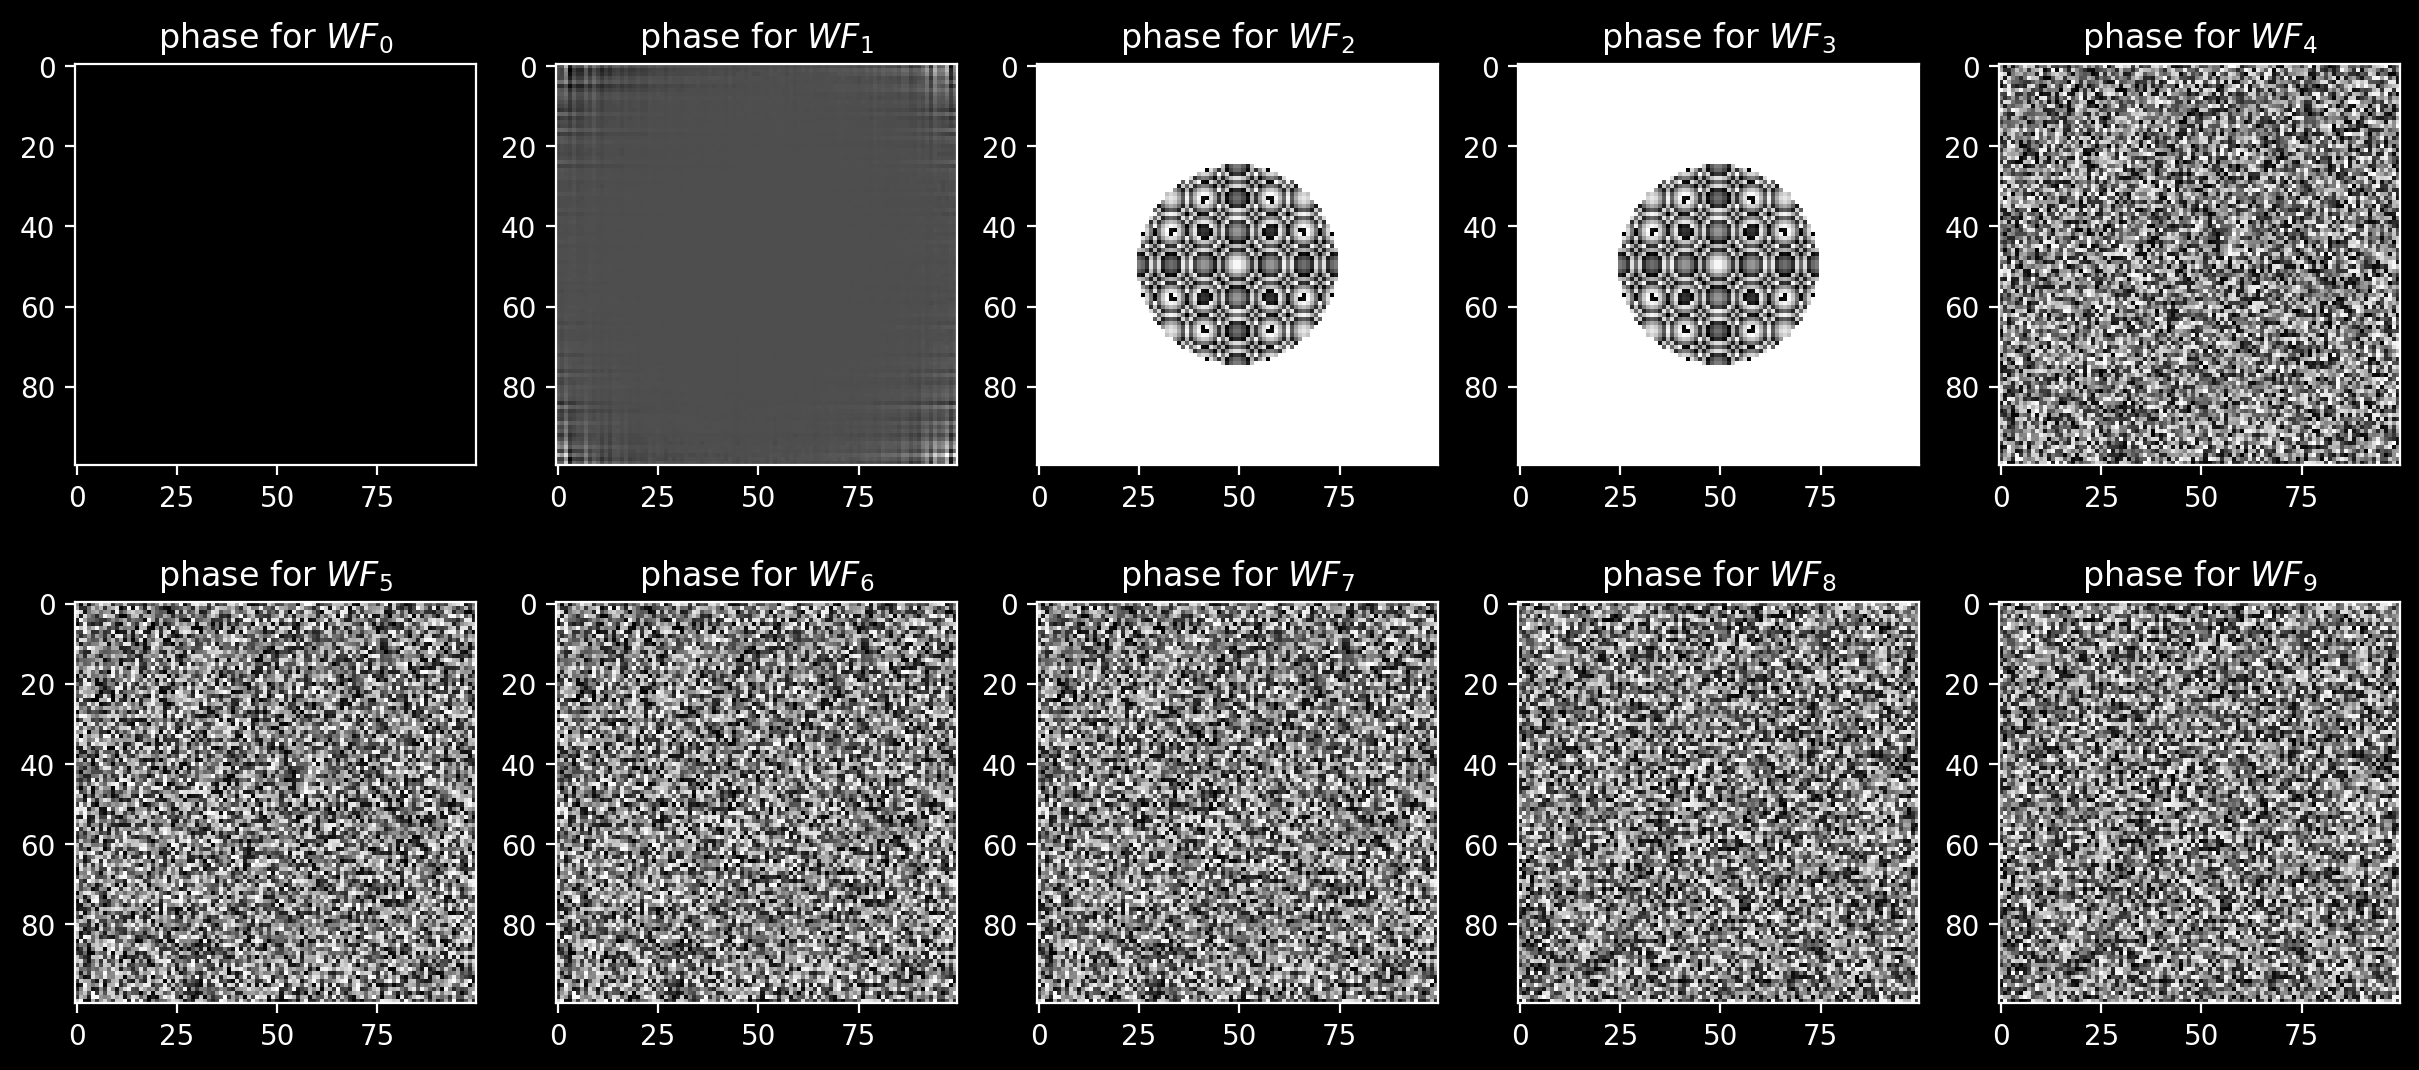

In [47]:
print(setup_scheme)

# plot wavefronts phase
fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols * 3, n_rows * 3.2))
for ind_wf, wavefront in enumerate(wavefronts):
    ax_this = axs[ind_wf // n_cols][ind_wf % n_cols]

    ax_this.set_title(f'phase for $WF_{ind_wf}$')
    # plot angle for each wavefront, because intensities pictures are indistinguishable from each other
    ax_this.imshow(wavefront.phase, cmap='gray')

plt.show()

In [ ]:
# TODO: solve the problem with a phase of Gaussian Beam!